## Title here ( i.e., House Price Prediction)

In [47]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* FirstName LastName 1
* FirstName LastName 2
* FirstName LastName 2

**Course:** CISD 43 – BIG DATA (Spring, 2024)

### Problem Statement
* This project  is about house price predictions.
    
    
    
* **Keywords:** House price prediction, real estate ,..., 
	

### Required packages

* Add instructions to install the required packages


In [48]:
## Your code begins here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import f_oneway


### Methodology

1. Explan your big data metodology



2. Introduce the topics you used in your project
 * Model 1
    * KNN
 
 * Stats 
    * Annova (not in the models needed but I think it helps explain the data)
 

### Your code starts here

### Loading Data

In [49]:
#loading data
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Checking the Data

In [50]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [52]:
df.describe(include= 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [53]:
# checking if there are any null in the dataset
df[df.isna().all(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [54]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [55]:
setosa_df = df[df['species'] == 'Iris-setosa']
versicolor_df =  df[df['species'] == 'Iris-versicolor']
virginica_df =  df[df['species'] == 'Iris-virginica']

### Visualizing the data

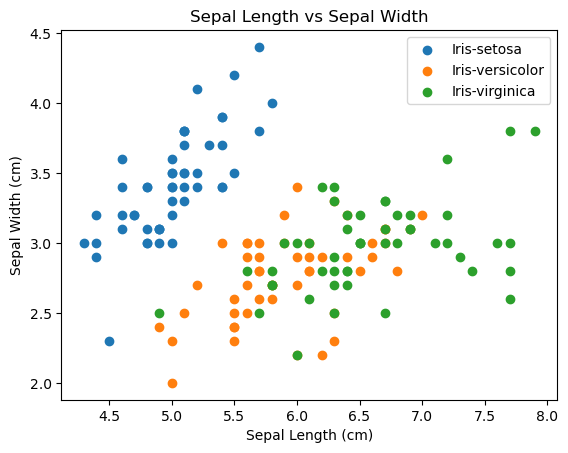

In [56]:
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

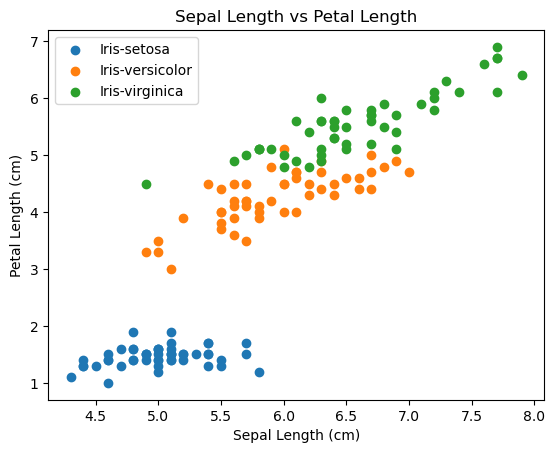

In [57]:
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['petal_length'], label=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')
plt.legend()
plt.show()

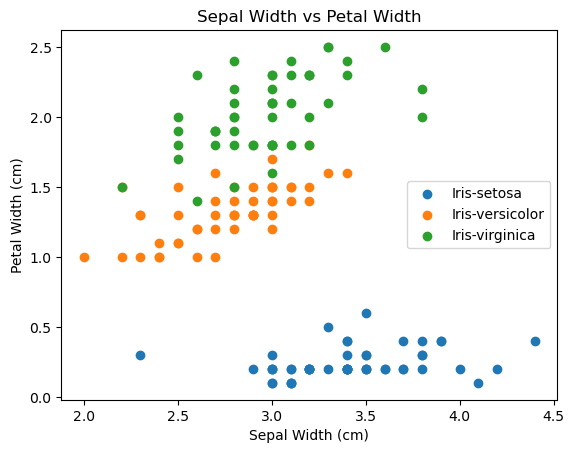

In [58]:
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_width'], subset['petal_width'], label=species)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal Width vs Petal Width')
plt.legend()
plt.show()

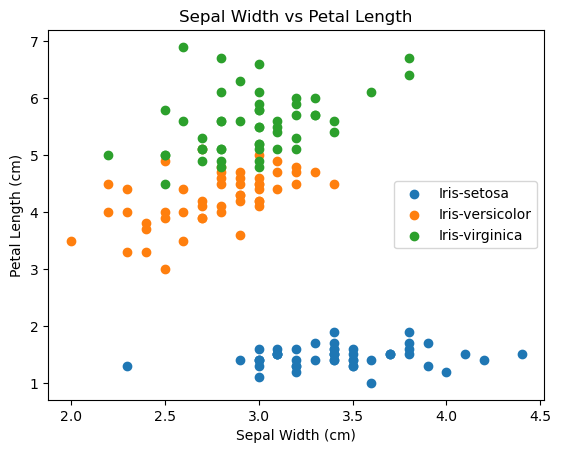

In [59]:
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_width'], subset['petal_length'], label=species)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Width vs Petal Length')
plt.legend()
plt.show()

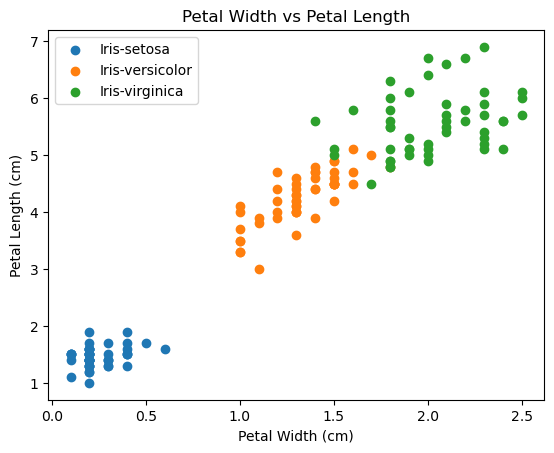

In [60]:
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal_width'], subset['petal_length'], label=species)
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Petal Width vs Petal Length')
plt.legend()
plt.show()

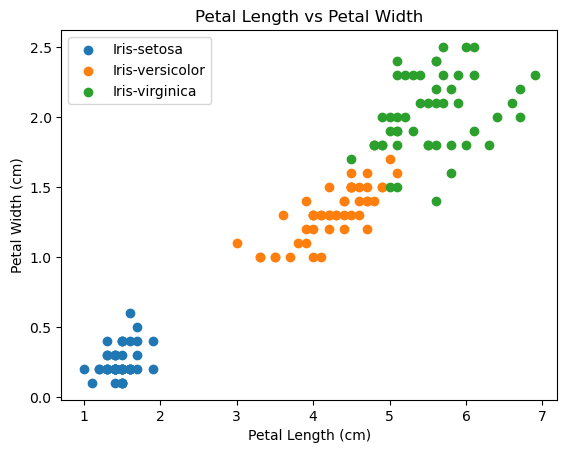

In [61]:
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal_length'], subset['petal_width'], label=species)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()

### Disabution of size depending on the size and iris type

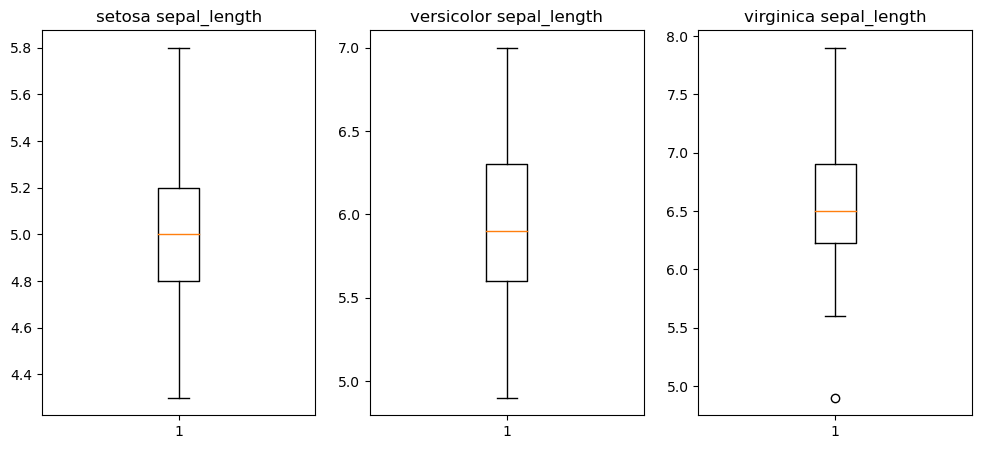

In [62]:
# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Box plots in subplots
axes[0].boxplot(setosa_df['sepal_length'])
axes[0].set_title('setosa sepal_length')

axes[1].boxplot(versicolor_df['sepal_length'])
axes[1].set_title('versicolor sepal_length')

axes[2].boxplot(virginica_df['sepal_length'])
axes[2].set_title('virginica sepal_length')


# Display the plots
plt.show()


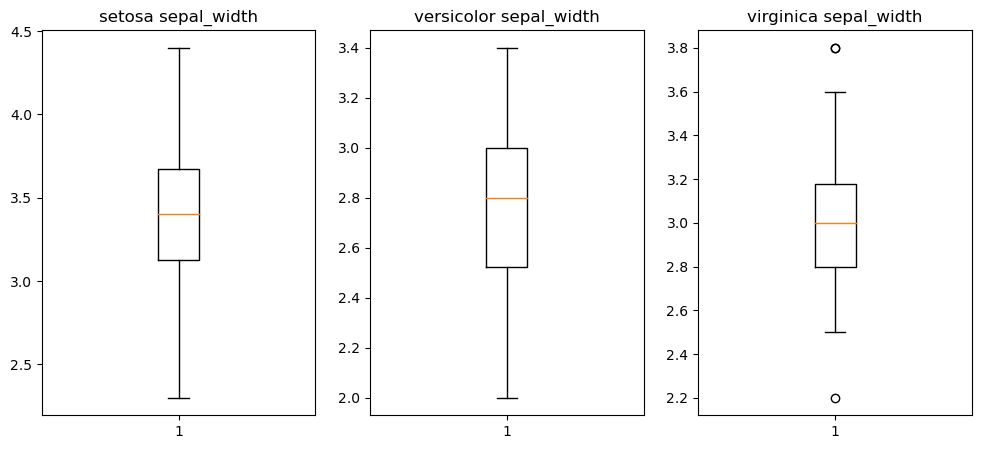

In [63]:
# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Box plots in subplots
axes[0].boxplot(setosa_df['sepal_width'])
axes[0].set_title('setosa sepal_width')

axes[1].boxplot(versicolor_df['sepal_width'])
axes[1].set_title('versicolor sepal_width')

axes[2].boxplot(virginica_df['sepal_width'])
axes[2].set_title('virginica sepal_width')


# Display the plots
plt.show()


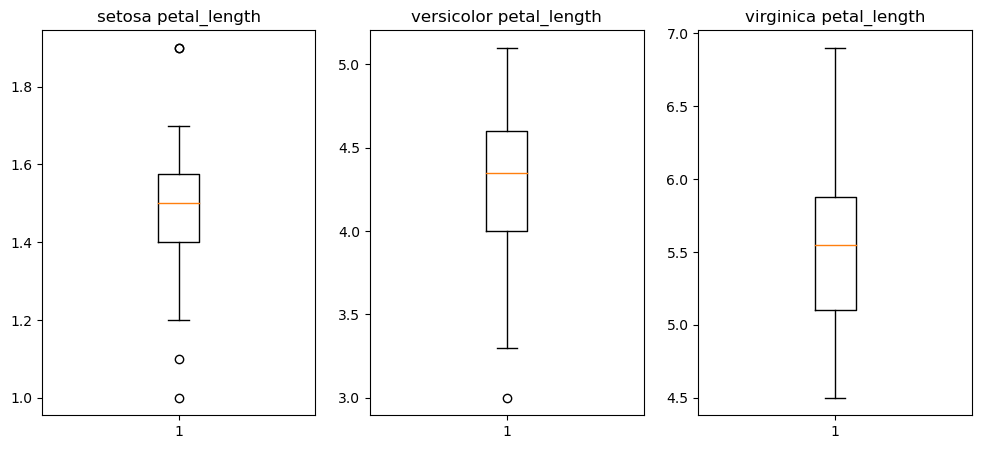

In [64]:
# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Box plots in subplots
axes[0].boxplot(setosa_df['petal_length'])
axes[0].set_title('setosa petal_length')

axes[1].boxplot(versicolor_df['petal_length'])
axes[1].set_title('versicolor petal_length')

axes[2].boxplot(virginica_df['petal_length'])
axes[2].set_title('virginica petal_length')


# Display the plots
plt.show()


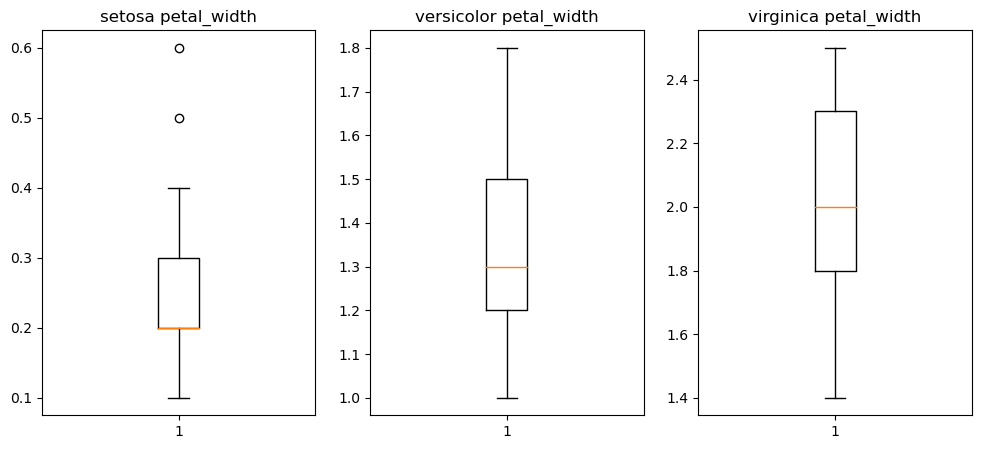

In [65]:
# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Box plots in subplots
axes[0].boxplot(setosa_df['petal_width'])
axes[0].set_title('setosa petal_width')

axes[1].boxplot(versicolor_df['petal_width'])
axes[1].set_title('versicolor petal_width')

axes[2].boxplot(virginica_df['petal_width'])
axes[2].set_title('virginica petal_width')


# Display the plots
plt.show()


## Using K nearest to classify the iris types

In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Spliting data

In [67]:
X = df.drop(columns='species')
y = df['species']
# chose 43 cause the class is CISD 43 so arbitrary number
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [68]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

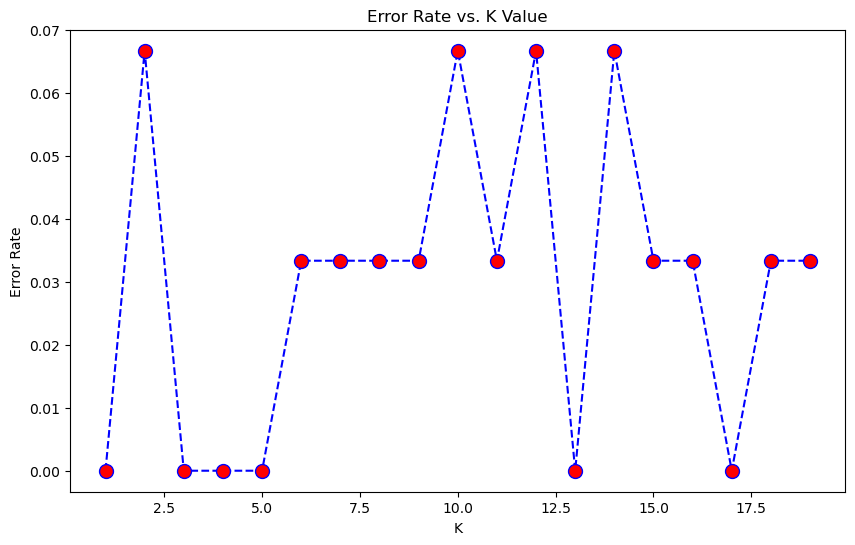

In [69]:
plt.figure(figsize=(10,6))

#plot range from 1 thru 40 vs my error rates
#provide a color, linestyle, markerfacecolor and markers size

plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

#add a title to the plot
plt.title('Error Rate vs. K Value')

#add xlabel
plt.xlabel('K')

#add ylabel
plt.ylabel('Error Rate')

In [70]:
# with this we can see that 3 makes the most amount of sence since there is three groups of iris and the error rate should be 0%

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


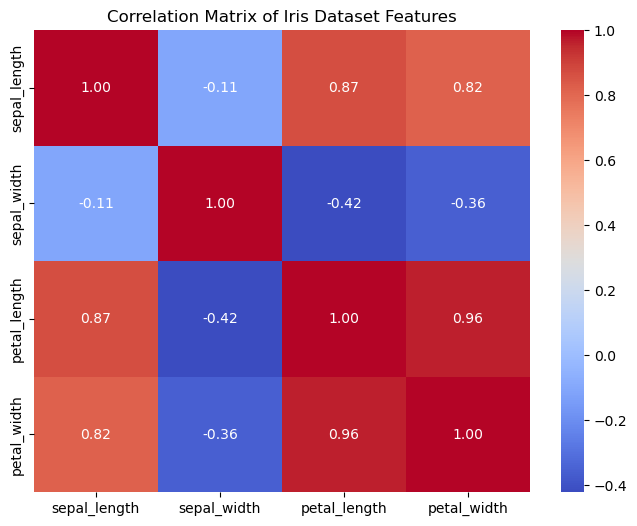

In [72]:
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

In [73]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [74]:
setosa_sepal_length = setosa_df['sepal_length']
versicolor_sepal_length = versicolor_df['sepal_length']
virginica_sepal_length = virginica_df['sepal_length']

f_statistic, p_value = f_oneway(setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length)

# Print the results
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

F-Statistic: 119.26450218450468
P-Value: 1.6696691907693826e-31


In [75]:
setosa_sepal_width = setosa_df['sepal_width']
versicolor_sepal_width = versicolor_df['sepal_width']
virginica_sepal_width = virginica_df['sepal_width']

f_statistic, p_value = f_oneway(setosa_sepal_width, versicolor_sepal_width, virginica_sepal_width)

# Print the results
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

F-Statistic: 47.36446140299382
P-Value: 1.3279165184572242e-16


In [76]:
setosa_petal_length = setosa_df['petal_length']
versicolor_petal_length = versicolor_df['petal_length']
virginica_petal_length = virginica_df['petal_length']

f_statistic, p_value = f_oneway(setosa_petal_length, versicolor_petal_length, virginica_petal_length)

# Print the results
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

F-Statistic: 1179.0343277002194
P-Value: 3.0519758018278374e-91


In [77]:
setosa_petal_width = setosa_df['petal_width']
versicolor_petal_width = versicolor_df['petal_width']
virginica_petal_width = virginica_df['petal_width']

f_statistic, p_value = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

# Print the results
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

F-Statistic: 959.3244057257613
P-Value: 4.376956957488959e-85


### Conclusions


With this we see that K-Nearest Neighbors (KNN) is a good predictor with k as 3. The reason for this is since there is 3 so we can expext it to be 3. While a 100% accuracy might be alarming since it is something that we dont expect since it means that the model "perfect", with the correlation table we see that the featues is really correlated with each other. I belive that logisitic regresssion would be better to explore this (done with rapid miner). 

One of the things that we can see with the ANOVA test is that the length and width of the petals and sepal is diffrent among the diffrent species. With a p-values < 0.01 we see that that the features selected is staicically signficant. The gives tells us that there is evidence that these features should be good predictors of the species.


###  References
   - Academic (if any)
   - Online (if any)
	

### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on .... (if any)*

In [78]:
# End of Project